In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Getting to know the dataset
data set 1: English Premier League 2017/18 season <br>

In [269]:
football_dataTrain = pd.read_csv("data/E0.csv")
dataTrain = pd.DataFrame(football_dataTrain)

dataTrain.drop(["MWG","Date","Referee"], axis = 1, inplace=True)

print("Shape = ",dataTrain.shape)
print(dataTrain.head(5))
print(dataTrain.dtypes)

Shape =  (380, 20)
         HomeTeam      AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  HST  \
0         Arsenal     Leicester     4     3   H     2     2   D  27   6   10   
1        Brighton      Man City     0     2   A     0     0   D   6  14    2   
2         Chelsea       Burnley     2     3   A     0     3   A  19  10    6   
3  Crystal Palace  Huddersfield     0     3   A     0     2   A  14   8    4   
4         Everton         Stoke     1     0   H     1     0   H   9   9    4   

   AST  HF  AF  HC  AC  HY  AY  HR  AR  
0    3   9  12   9   4   0   1   0   0  
1    4   6   9   3  10   0   2   0   0  
2    5  16  11   8   5   3   3   2   0  
3    6   7  19  12   9   1   3   0   0  
4    1  13  10   6   7   1   1   0   0  
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF     

# The classes for the Dataset
use the below function to append newer ratings to the classes dataset when they have been submitted through the goodgame websote

In [270]:
football_ratings = pd.read_csv("data/E0matchratings.csv")

allRatings = pd.DataFrame(football_ratings)

def add_new_ratings(col_name, ratings):
    allRatings[col_name] = ratings
    allRatings[col_name] = allRatings[col_name].astype(int)
    allRatings.to_csv("data/E0matchratings.csv", index=None)
    
#ratings = 
#col_name =
#add_new_ratings(col_name, ratings)

print(allRatings.head())

   P1  P2  P3  P4  P5
0   5   5   5   5   5
1   3   3   3   3   3
2   5   5   5   5   5
3   4   5   4   5   4
4   2   3   2   2   2


Shape =  (380, 6)
   P1  P2  P3  P4  P5  Rating
0   5   5   5   5   5     5.0
1   3   3   3   3   3     3.0
2   5   5   5   5   5     5.0
3   4   5   4   5   4     4.0
4   2   3   2   2   2     2.0
P1        0
P2        0
P3        0
P4        0
P5        0
Rating    0
dtype: int64
data does not contain any empty values
P1        380
P2        380
P3        380
P4        380
P5        380
Rating    380
dtype: int64


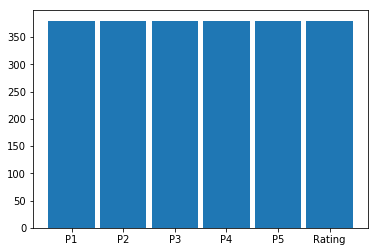

Rating
1.0     31
2.0     67
3.0     84
4.0     86
5.0    112
dtype: int64


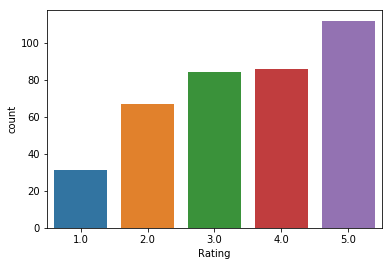

In [271]:
def emptyCheck(data):
    if sum(data.isnull().sum()) == 0:
        print(data.isnull().sum())
        print("data does not contain any empty values")
    else:
        print("rows that contain empty values")
        print(dataTrain[dataTrain.isnull().any(axis=1)])

avrRating = round(allRatings.mean(axis = 1))
allRatings["Rating"] = avrRating

print("Shape = ", allRatings.shape)
print(allRatings.head(5))

y = allRatings["Rating"]

emptyCheck(allRatings)
print(allRatings.count())

fig, ax = plt.subplots() 
data = allRatings.count() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency, width=0.9) 

plt.show()

print(allRatings.groupby("Rating").size())
sns.countplot(x="Rating",data=allRatings)

plt.show()

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64
data does not contain any empty values
HomeTeam    380
AwayTeam    380
FTHG        380
FTAG        380
FTR         380
HTHG        380
HTAG        380
HTR         380
HS          380
AS          380
HST         380
AST         380
HF          380
AF          380
HC          380
AC          380
HY          380
AY          380
HR          380
AR          380
dtype: int64


<BarContainer object of 20 artists>

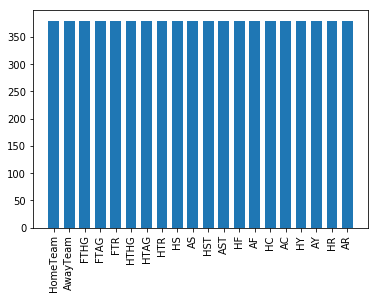

In [272]:
emptyCheck(dataTrain)
print(dataTrain.count())

fig, ax = plt.subplots() 
data = dataTrain.count() 
points = data.index 
frequency = data.values 
plt.xticks(rotation='vertical')
ax.bar(points, frequency, width=0.7, align='center')

In [273]:
print(dataTrain.describe())

             FTHG        FTAG        HTHG        HTAG          HS          AS  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     1.531579    1.147368    0.607895    0.515789   13.584211   10.855263   
std      1.340087    1.177793    0.793403    0.756511    5.771439    4.858700   
min      0.000000    0.000000    0.000000    0.000000    2.000000    0.000000   
25%      1.000000    0.000000    0.000000    0.000000    9.000000    7.000000   
50%      1.000000    1.000000    0.000000    0.000000   13.000000   10.500000   
75%      2.000000    2.000000    1.000000    1.000000   17.000000   14.000000   
max      7.000000    6.000000    4.000000    3.000000   35.000000   30.000000   

              HST         AST          HF          AF          HC          AC  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     4.626316    3.763158   10.218421   10.478947    5.739474    4.544737   
std      2.706845    2.3170

# Visualising the first dataset

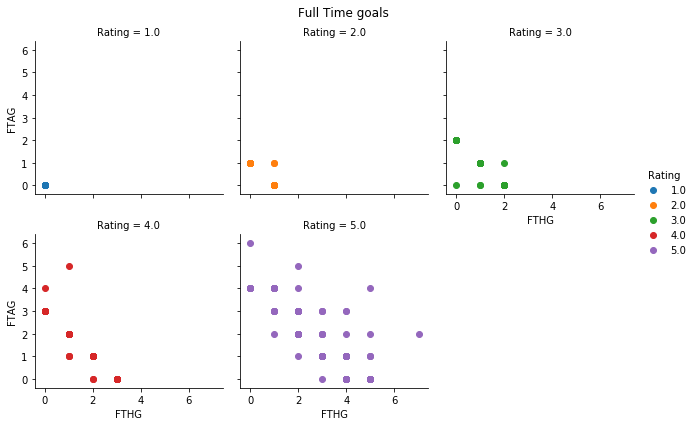

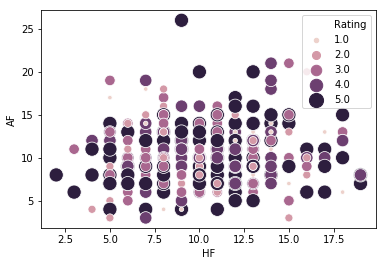

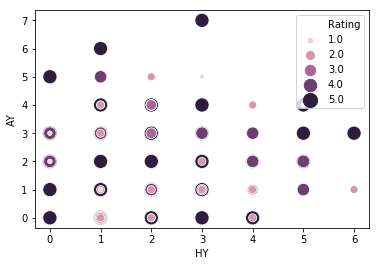

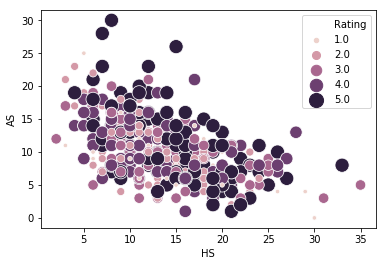

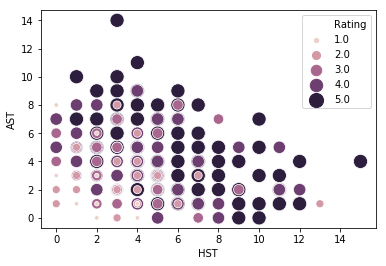

In [274]:
#Visualisations
visualDF = pd.DataFrame(football_dataTrain)
visualDF["Rating"] = y
visualDF["FTHG"] = visualDF["FTHG"].astype(object)
visualDF["FTAG"] = visualDF["FTAG"].astype(object)

g = sns.FacetGrid(visualDF, col='Rating', hue='Rating', col_wrap=3)
g = g.map(plt.scatter, 'FTHG', 'FTAG').add_legend()

plt.subplots_adjust(top=0.90)
g = g.fig.suptitle('Full Time goals')
plt.show()

ax = sns.scatterplot(x="HF", y="AF",hue="Rating", size="Rating",sizes=(20, 200), legend="full", data=visualDF)
plt.show()

ax = sns.scatterplot(x="HY", y="AY",hue="Rating", size="Rating",sizes=(20, 200), legend="full", data=visualDF)
plt.show()

ax = sns.scatterplot(x="HS", y="AS",hue="Rating", size="Rating",sizes=(20, 200), legend="full", data=visualDF)
plt.show()

az = sns.scatterplot(x="HST", y="AST",hue="Rating", size="Rating",sizes=(20, 200), legend="full", data=visualDF)
plt.show()


# Data Pre-processing
use the label encode to convert data

In [275]:
LE = LabelEncoder()

def convert_data(data):
    for col in data.columns:
        if data[col].dtype == object:        
            data[col] = LE.fit_transform(data[col])
    return data    

convert_data(dataTrain)

print(dataTrain.head(10))
print(dataTrain.dtypes)

   HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR  HS  AS  HST  AST  HF  \
0         0         8     4     3    2     2     2    1  27   6   10    3   9   
1         2        10     0     2    0     0     0    1   6  14    2    4   6   
2         4         3     2     3    0     0     3    0  19  10    6    5  16   
3         5         7     0     3    0     0     2    0  14   8    4    6   7   
4         6        14     1     0    2     1     0    2   9   9    4    1  13   
5        13        15     0     0    1     0     0    1  29   4    2    0  10   
6        17         9     3     3    1     2     1    2   9  14    4    5  14   
7        18         1     1     0    2     1     0    2  16   9    6    2  15   
8        11        19     4     0    2     1     0    2  22   9    6    1  19   
9        12        16     0     2    0     0     0    1   6  18    3    6   6   

   AF  HC  AC  HY  AY  HR  AR  
0  12   9   4   0   1   0   0  
1   9   3  10   0   2   0   0  
2  11   8   

# Train test split 
the model is first defined below then use train and test split 

In [276]:
#Train test split
xTrain, xTest, yTrain, yTest = train_test_split(dataTrain, y, test_size=0.3)

print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

lr_classifier = LogisticRegression(solver = "liblinear", multi_class='ovr')

lr_classifier.fit(xTrain,yTrain)

yPredict = lr_classifier.predict(xTest)

print('Actual: ', yTest.values)
print('Predictions: ', yPredict)

(266, 20) (266,) (114, 20) (114,)
Actual:  [5. 1. 2. 1. 4. 5. 5. 1. 4. 3. 2. 1. 1. 5. 5. 5. 3. 1. 2. 5. 5. 5. 2. 5.
 2. 4. 3. 1. 4. 2. 5. 3. 5. 4. 2. 2. 2. 2. 3. 5. 3. 3. 5. 5. 5. 2. 5. 4.
 5. 2. 4. 2. 2. 5. 5. 1. 1. 5. 4. 5. 2. 2. 4. 5. 1. 5. 3. 5. 2. 3. 4. 4.
 5. 3. 3. 3. 5. 4. 5. 3. 3. 5. 5. 3. 5. 5. 4. 2. 2. 4. 4. 5. 3. 5. 1. 1.
 4. 4. 5. 5. 2. 2. 5. 3. 4. 4. 3. 3. 5. 3. 3. 2. 5. 3.]
Predictions:  [5. 1. 2. 2. 5. 5. 5. 2. 5. 3. 3. 1. 2. 5. 5. 4. 4. 2. 4. 5. 5. 5. 2. 5.
 2. 5. 3. 1. 4. 2. 5. 4. 5. 3. 2. 3. 2. 2. 3. 5. 3. 3. 5. 5. 5. 4. 5. 4.
 5. 3. 5. 3. 2. 5. 5. 1. 2. 5. 4. 5. 2. 2. 4. 5. 1. 5. 2. 5. 2. 3. 3. 5.
 5. 3. 3. 2. 5. 3. 5. 4. 4. 5. 5. 3. 5. 5. 3. 2. 4. 4. 3. 5. 3. 5. 2. 2.
 5. 3. 5. 5. 3. 4. 5. 4. 5. 5. 4. 3. 5. 3. 3. 3. 5. 3.]


Accuracy =  0.6491228070175439


Text(0.5, 15.0, 'Predicted Rating')

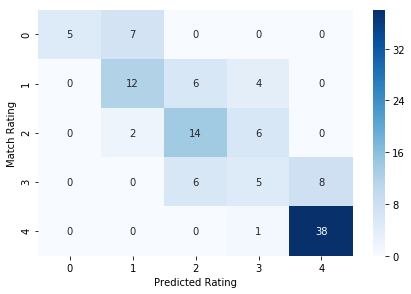

In [277]:
prediction = lr_classifier.score(xTest,yTest)
print("Accuracy = ", prediction)

confusion_matrix = metrics.confusion_matrix(yTest, yPredict)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues" ,fmt='g')

plt.tight_layout()
plt.ylabel('Match Rating')
plt.xlabel('Predicted Rating')

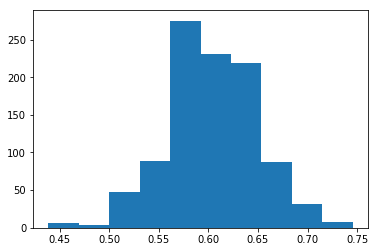

In [278]:
accuracies = []
for i in range (0,1000):
    xTrain, xTest, yTrain, yTest = train_test_split(dataTrain, y, test_size=0.3)
    model = LogisticRegression(solver = "liblinear", multi_class='ovr')
    model.fit(xTrain,yTrain)
    prediction = model.score(xTest,yTest)
    accuracies.append(prediction)
    
plt.hist(accuracies)
plt.show()

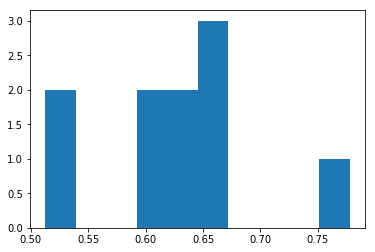

Average Accuracy Score = 0.6276514215410236
Standard Deviation: 0.0695540472755119


In [279]:
StratifiedKFold(n_splits=10), dataTrain, y
cv_scores = cross_val_score(lr_classifier, dataTrain, y, cv=10)
plt.hist(cv_scores)
plt.show()
print("Average Accuracy Score =", np.mean(cv_scores))
print("Standard Deviation:", cv_scores.std())

# find the most optimal features 
using recursive feature elimination find the most optimal features to train on

[0.4137674210203093, 0.8143186582949099, 0.7918738440721753, 0.7975755984581402, 0.7498146097119139, 0.7421911498740767, 0.7392671732658895, 0.7370129416470881, 0.7183093659473634, 0.6823350728036223, 0.6754245029565954, 0.6823105783279082, 0.6692235337934953, 0.6666952288518398, 0.6594198765764877, 0.6699323664535475, 0.6510018975230786, 0.6611217633650239, 0.6427251518329824, 0.6276514215410236]
          0  feature_amount
0  0.413767               1
1  0.814319               2
2  0.791874               3
3  0.797576               4
4  0.749815               5


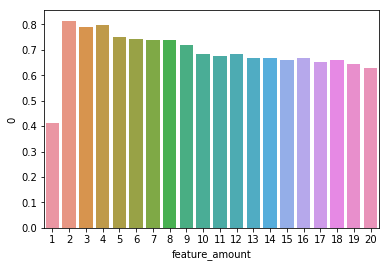

In [280]:
from sklearn.feature_selection import RFE

def best_features(model, features, xTrain, yTrain):
    accuracies = []
    for i in range(1,features):
        rfe = RFE(model, i)
        rfe = rfe.fit(xTrain,yTrain)
        
        columns = []
        j = 0
        for i in rfe.ranking_:
            if i == 1:
                columns.append(dataTrain.columns[j])
            j+=1
        dataTrainClean = pd.DataFrame(football_dataTrain, columns = columns)
        convert_data(dataTrainClean)         
        StratifiedKFold(n_splits=10), dataTrainClean, y
        cv_scores = cross_val_score(model, dataTrainClean, y, cv=10)
        accuracies.append(np.mean(cv_scores))
    return accuracies
        
accuracy = best_features(lr_classifier, 21, xTrain, yTrain)
tempDF = pd.DataFrame(accuracy)
feature_amount = range(1,21)
tempDF["feature_amount"] = feature_amount

print(accuracy)
print(tempDF.head())
ax = sns.barplot(x="feature_amount", y=tempDF[0], data=tempDF)

In [281]:
rfe = RFE(lr_classifier, 4)
rfe = rfe.fit(xTrain,yTrain)

print(rfe.support_)
print(rfe.ranking_)

columns = []
j = 0
for i in rfe.ranking_:
    if i == 1:
        columns.append(dataTrain.columns[j])
    j+=1

print("most optimal features to use:")
print (columns)

columns1 = ['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HR', 'AR']
dataTrainClean = pd.DataFrame(football_dataTrain, columns = columns)
print (dataTrainClean.head(10))
convert_data(dataTrainClean)
print (dataTrainClean.head(10))

[False False  True  True  True  True False False False False False False
 False False False False False False False False]
[17 15  1  1  1  1  3  2 12 14  7 10  8  6 16 11 13  9  4  5]
most optimal features to use:
['FTHG', 'FTAG', 'FTR', 'HTHG']
  FTHG FTAG FTR  HTHG
0    4    3   H     2
1    0    2   A     0
2    2    3   A     0
3    0    3   A     0
4    1    0   H     1
5    0    0   D     0
6    3    3   D     2
7    1    0   H     1
8    4    0   H     1
9    0    2   A     0
   FTHG  FTAG  FTR  HTHG
0     4     3    2     2
1     0     2    0     0
2     2     3    0     0
3     0     3    0     0
4     1     0    2     1
5     0     0    1     0
6     3     3    1     2
7     1     0    2     1
8     4     0    2     1
9     0     2    0     0


(266, 4) (266,) (114, 4) (114,)
Actual:  [2. 5. 5. 4. 3. 5. 4. 4. 4. 5. 5. 5. 1. 3. 3. 2. 2. 2. 2. 3. 5. 3. 5. 5.
 4. 5. 5. 2. 5. 1. 5. 4. 5. 3. 5. 3. 4. 3. 2. 3. 3. 3. 1. 5. 2. 5. 3. 3.
 5. 2. 3. 5. 1. 4. 4. 1. 3. 1. 5. 2. 5. 5. 4. 4. 2. 3. 2. 3. 4. 1. 3. 3.
 3. 4. 2. 5. 1. 2. 5. 4. 2. 5. 5. 1. 5. 5. 2. 2. 3. 3. 2. 2. 4. 1. 4. 3.
 2. 3. 4. 3. 3. 1. 5. 4. 3. 1. 2. 5. 5. 5. 3. 2. 2. 5.]
Predictions:  [2. 5. 5. 4. 4. 5. 3. 4. 4. 5. 5. 5. 1. 3. 4. 2. 2. 3. 2. 4. 5. 4. 5. 5.
 5. 5. 5. 3. 5. 1. 5. 3. 5. 3. 5. 4. 3. 4. 2. 3. 4. 3. 1. 5. 2. 5. 4. 4.
 5. 2. 4. 5. 1. 4. 5. 1. 4. 1. 5. 2. 5. 5. 5. 5. 2. 4. 3. 4. 3. 1. 3. 3.
 1. 5. 2. 5. 1. 3. 5. 5. 3. 5. 5. 1. 5. 5. 3. 2. 3. 3. 2. 3. 4. 1. 4. 3.
 2. 3. 5. 4. 4. 1. 5. 4. 3. 1. 2. 5. 5. 5. 4. 2. 2. 5.]
Accuracy =  0.6929824561403509


Text(0.5, 15.0, 'Predicted Rating')

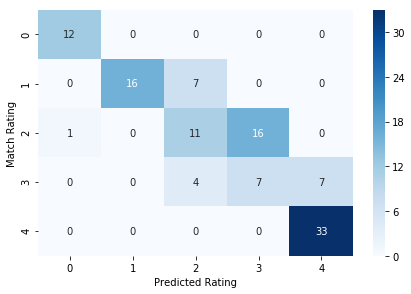

In [282]:
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(dataTrainClean, y, test_size=0.3)

print(xTrain1.shape, yTrain1.shape, xTest1.shape, yTest1.shape)

lr_classifier.fit(xTrain1,yTrain1)

yPredict1 = lr_classifier.predict(xTest1)

print('Actual: ', yTest1.values)
print('Predictions: ', yPredict1)
prediction1 = lr_classifier.score(xTest1,yTest1)
print("Accuracy = ", prediction1)

confusion_matrix = metrics.confusion_matrix(yTest1, yPredict1)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues" ,fmt='g')

plt.tight_layout()
plt.ylabel('Match Rating')
plt.xlabel('Predicted Rating')

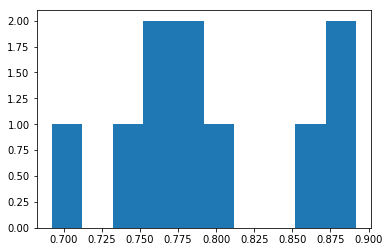

Average Accuracy Score = 0.7975755984581402


In [283]:
StratifiedKFold(n_splits=10), dataTrainClean, y
cv_scores = cross_val_score(lr_classifier, dataTrainClean, y, cv=10)
plt.hist(cv_scores)
plt.show()
print("Average Accuracy Score =", np.mean(cv_scores))

# find the most optimal parameters for the model
the below will find the best performing parameters for the model

In [284]:
model_parameters = {
                  'penalty' : [ 'l2'],
                  'solver' : ['liblinear','newton-cg', 'lbfgs', 'sag', 'saga'],
                 'multi_class' : ['ovr','auto']}

lr_model = LogisticRegression()

cross_val = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(lr_model,
                           param_grid=model_parameters,
                           cv=cross_val)

grid_search.fit(xTrain1,yTrain1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 'multi_class': ['ovr', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [285]:
print('The best score achieved:', grid_search.best_score_)
lr_model = grid_search.best_estimator_
print("the best model", lr_model)

The best score achieved: 0.9511278195488722
the best model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


# test on new data
using a chunk of matches with ratings see how the model performs on unseen data

   FTHG  FTAG FTR  HTHG
0     2     1   H     1
1     2     0   H     1
2     0     2   A     0
3     0     3   A     0
4     1     2   A     1
   FTHG  FTAG  FTR  HTHG
0     2     1    2     1
1     2     0    2     1
2     0     2    0     0
3     0     3    0     0
4     1     2    0     1
prediction =  [4. 3. 3. 4. 4. 3. 5. 3. 5. 1. 1. 5. 4. 3. 5. 4. 5. 5. 5. 3. 5. 5. 1. 2.
 4. 3. 5. 4. 4. 4. 5. 3. 3. 3. 4. 4. 2. 3. 5. 4. 5. 5. 2. 4. 4. 4. 4. 5.
 2. 5.]
Accuracy =  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



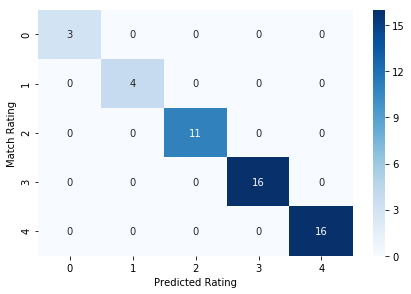

In [286]:
football_dataTest = pd.read_csv("data/testData.csv")

x_new = pd.DataFrame(football_dataTest, columns=columns)
y_new = pd.DataFrame(football_dataTest, columns=["MPER"])

print(x_new.head())
convert_data(x_new)
print(x_new.head())

test_prediction = lr_model.predict(x_new)

acc = lr_model.score(x_new, y_new)
print("prediction = ", test_prediction)
print("Accuracy = ", acc)

confusion_matrix = metrics.confusion_matrix(y_new, test_prediction)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues" ,fmt='g')

plt.tight_layout()
plt.ylabel('Match Rating')
plt.xlabel('Predicted Rating')

report = classification_report(y_new, test_prediction)
print(report)


# Use final model
below use the optimal model and optimal features to get ratings on data from the dataset<br>
dataset: English premier league season 2018/19

In [287]:
current_seasons = pd.read_csv("data/E1.csv")
# only get the matches that have not been rated yet
data = current_seasons[current_seasons.values  == "na"]
latest_matches = pd.DataFrame(data, columns=columns)

if latest_matches.size > 0: 
    print(latest_matches.head())
    convert_data(latest_matches)
    print(latest_matches.head())
    predict = lr_model.predict(latest_matches)
    print(predict)
    data["MPER"] = predict
    data.to_csv("data/E1newpredictions.csv", index=None)
else:
    print(latest_matches.size)
    print("there is no matches to predict")

0
there is no matches to predict
